<a href="https://colab.research.google.com/github/YCYoon2015/DL_zero_to_all_PyTorch/blob/master/210909_Basic_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification

여기서는 binary 부터 배운다

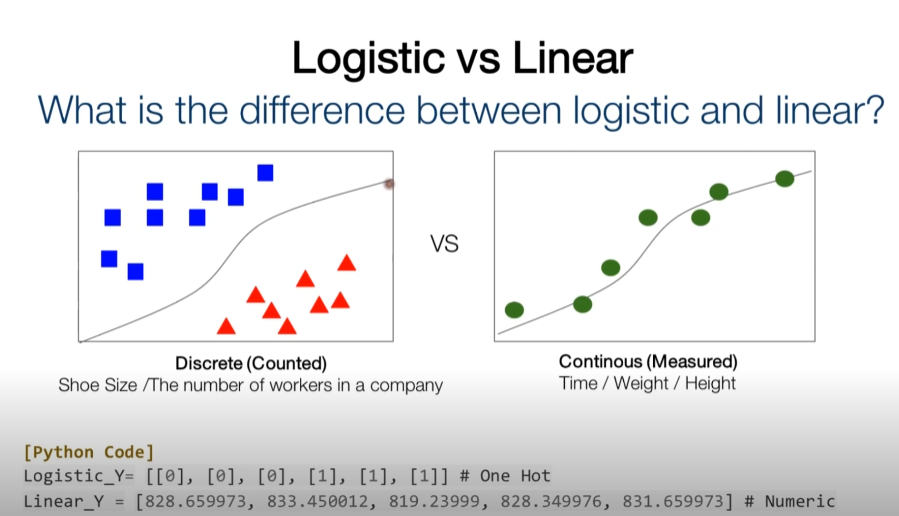

위 예시를 보면 왼쪽은 구분, 오른쪽은 선형이다.

신발사이즈 같이 항목으로 나눠지는것이 왼쪽, 시간과 같이
연속적인값이 오른쪽이다.

앞서 공부한 선형 회귀를 이용하면, 신발사이즈가 270, 275인 사람을 구분하는데 문제가 발생한다. 선형 회귀로는 271 272 273과같이 중간값들이 발생되기 때문이다. 따라서 이를 0, 1로 나눠주는 가설이 필요하다.

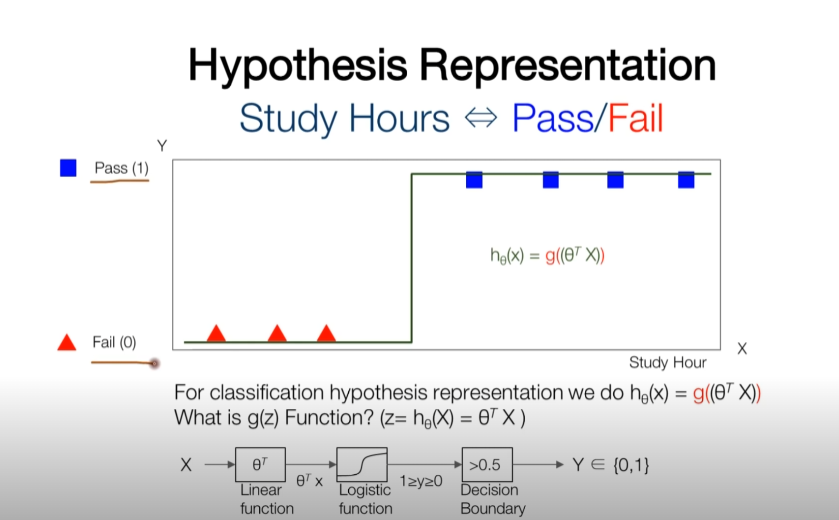

위 그림을보면 g를 통해서 선형으로 나온 값을 0, 1로 바꿔준다.

g를 Logistic function이라고 부른다.

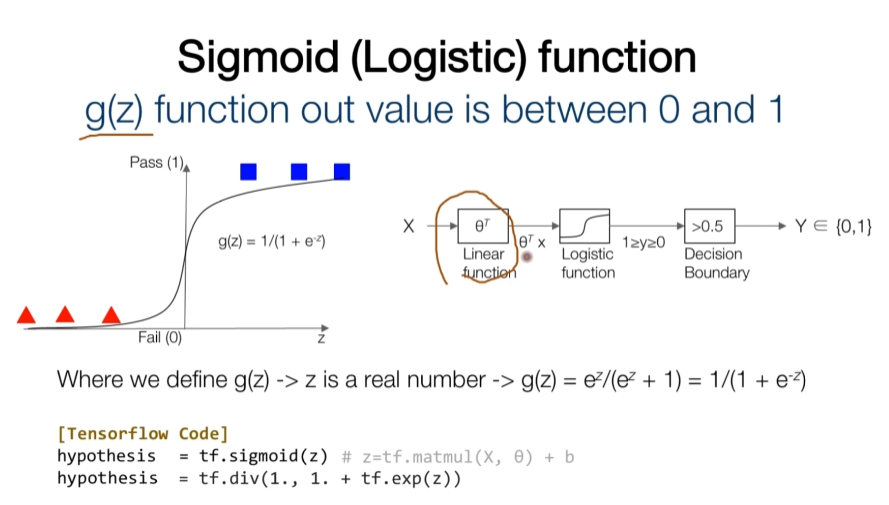

위에 사용한 g(z)함수는 시그모이드 함수이다.

이제 시그모이드 함수를 좀더 자세하게 알아보자



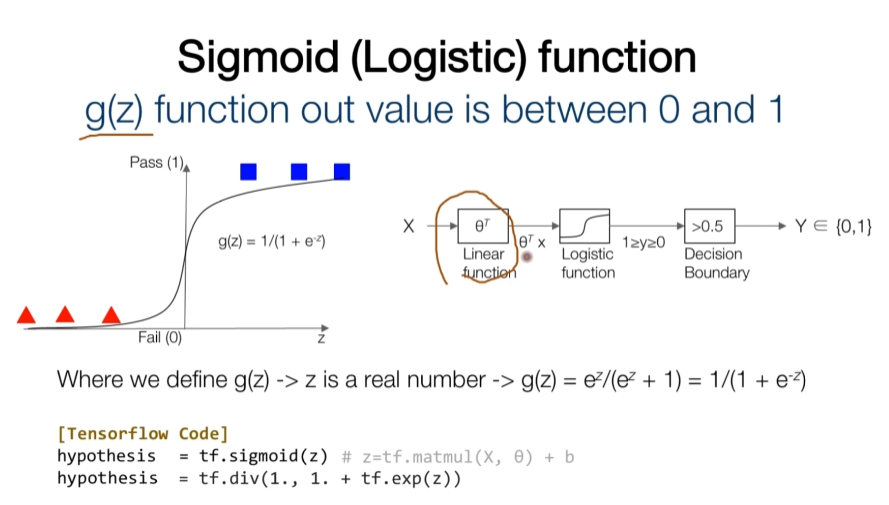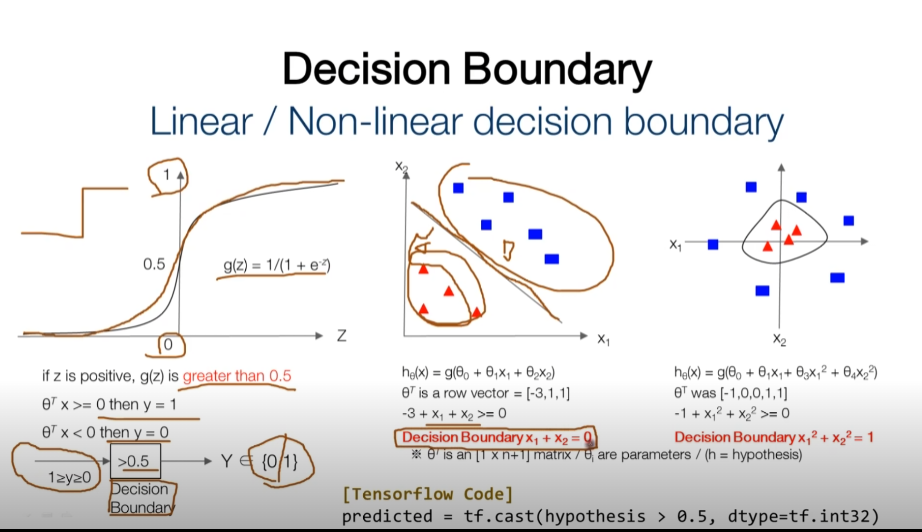

우리가 선형회귀로 구한값을 0.5를 기준으로 0,1로 구분한다.

0.5를 Decision Boundary라고 한다.



## cost함수 정의




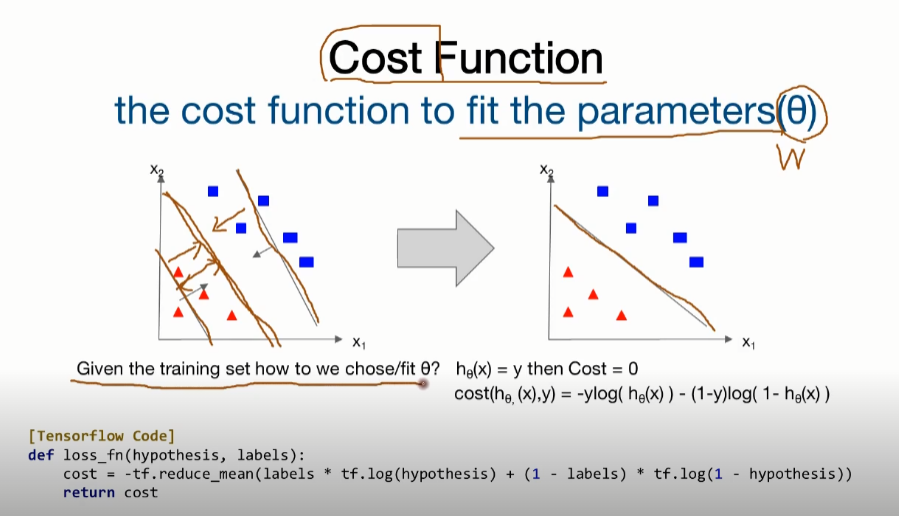

우선 cost함수를 어떻게 정의해야 할까? 

처음에 W 값을 랜덤으로 준다. 그리고 결과값에 따라 W를 이동시키면서 가장 완벽하게 구분되는 지점을 찾아가는것이다. 따라서 cost는 결과값과의 차이이다. 

cost함수에 가설과 정답을 넣어서 위와같이 코드로 구현한다.

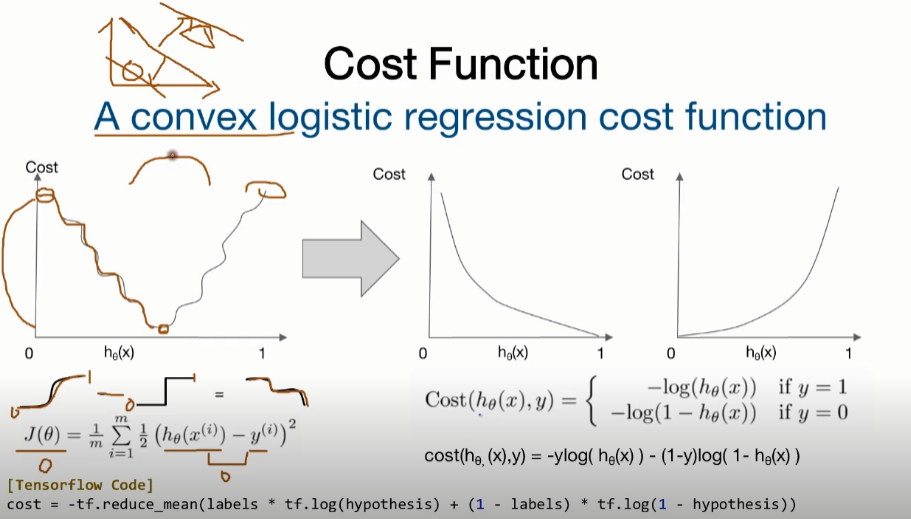

하지만 시그모이드에 0.5계단함수를 빼면 왼쪽 그래프처럼 구불구불하게 형성된다.

이를 해결하기위해 log함수를 이용한다. 위에 저 두개를 합쳐서 cost함수를 정의한다.

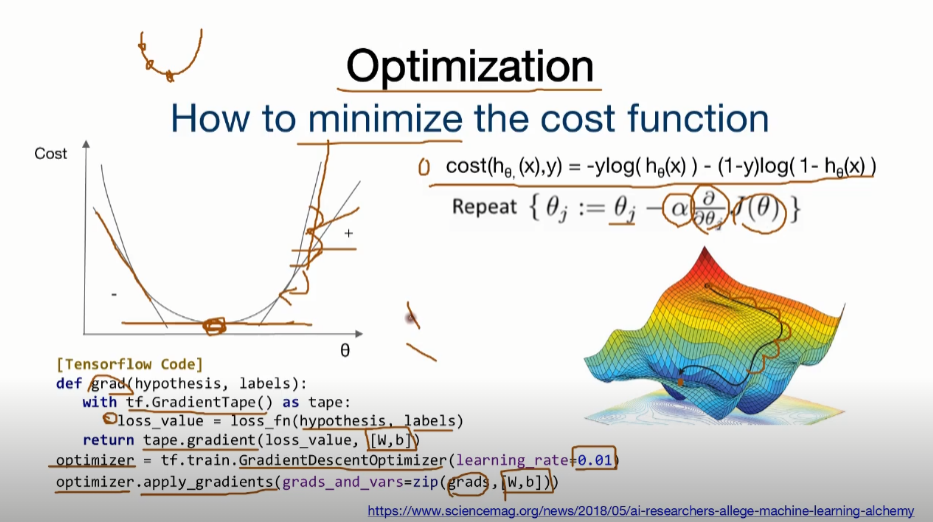

cost함수는 정답으로 갈수록 cost가 낮아져야 한다. 기울기는 cost 최소에 다가갈수록 기울기가 작아지면서 최적의 위치를 찾게한다.

gradientTape함수를 사용하여 loss값을 구하고, 그레디언트를 저장한다.

optimizer를 정의하고 앞에 선언한 gradientTape 함수를 이용해 지속적으로 그레디언트를 전달하면서 optimizer를 반복시킨다.

## 코드 구현

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

tf.random.set_seed(777)  # for reproducibility
print(tf.__version__)

2.6.0


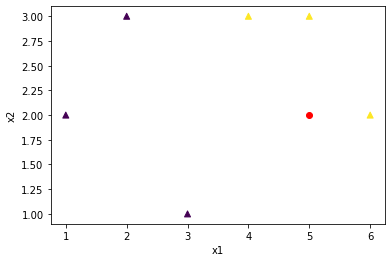

In [2]:
# 두개의 값은 각 좌표평면을 이룬다고 보면 이해가 쉽다.
x_train = [[1., 2.],
          [2., 3.],
          [3., 1.],
          [4., 3.],
          [5., 3.],
          [6., 2.]]
# 각 데이터는 0, 1로 구분되어진다.
y_train = [[0.], 
          [0.],
          [0.],
          [1.],
          [1.],
          [1.]]

# 랜덤
x_test = [[5.,2.]] 
y_test = [[1.]]

# x1은 x2는 각 리스트에 같은 index로 담기게 된다.
x1 = [x[0] for x in x_train] # 1 2 3
x2 = [x[1] for x in x_train] # 2 3 1

# 그림 그리기
colors = [int(y[0] % 3) for y in y_train]
plt.scatter(x1,x2, c=colors , marker='^')
plt.scatter(x_test[0][0],x_test[0][1], c="red") # 테스트 데이터

plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [3]:
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(len(x_train))#.repeat()
# batch size는 한번에 학습시킬 양이다.
# from_tensor_slices을 이용해 각각 x, y가 [0,0] [0] 형태로 총 6개가 만들어진다. (즉, 슬라이싱이 된다.)

In [4]:
W = tf.Variable(tf.zeros([2,1]), name='weight') # 슬라이싱된 X가 [0, 0] 형태이므로 W는 [[0], [0]]의 세로 벡터가 된다. 
b = tf.Variable(tf.zeros([1]), name='bias') # 위 계산에서 1x1 행렬이 나오므로 bias는 이와 맞춘다.
# 초기값을 0으로 잡았다. random하게 할수도 있다.

In [6]:
# 가설로 시그모이드 함수를 정의한다.
def logistic_regression(features):
    hypothesis  = tf.divide(1., 1. + tf.exp(-tf.matmul(features, W) + b)) # 시그모이드
    # divide(a, b) = a/b
    # exp(a) = e^a
    # matmul(A, B) = A*B 벡터 곱
    return hypothesis


In [7]:
# Cost 함수를 정의한다.
# 위에서 log 함수 2개를 이용해서 정의한 방법을 이용하여 정의한다.


def loss_fn(hypothesis, features, labels): # 가설, 인자, 라벨
    # 비용 = -y * log(H) - (1 - y) * log(1 - H) 
    cost = -tf.reduce_mean(labels * tf.math.log(logistic_regression(features)) + (1 - labels) * tf.math.log(1 - hypothesis))
    # reduce_mean은 원소 전체의 평균이다. 뒤에 숫자가 붙으면 행렬 방향을 나타낸다.
    return cost

# 지금은 아직 알수없는 optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

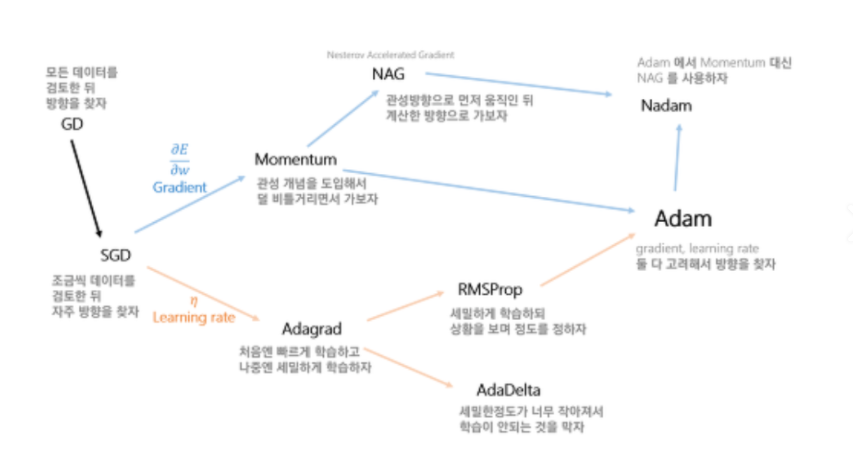

In [8]:


def accuracy_fn(hypothesis, labels): # 가설, 라벨
    predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32) # 예측치 = 0.5보다 크면 1을 리턴
    # cast함수는 탠서를 새로운 형태로 바꿔준다. 소수점은 버린다.
    # 여기선 첫번째 인자가 Bool 값이고, 두번째 인자가 변환되는 값이다. (1, 0)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.int32)) # 위에 예측치와 라벨값을 비교해 정확도 구함
    # 위와같이 첫번째 인자가 bool이고 두번째 인자가 변환되는 값이다. (일치하면 1)
    # reduce_mean은 각 값의 총 평균이다.
    return accuracy

In [9]:
def grad(features, labels):
    with tf.GradientTape() as tape: # 각각의 미분값을 기록한다.
        loss_value = loss_fn(logistic_regression(features),features,labels)
        # loss값(비용) = 로스 함수에 가설, 학습인풋, 라벨 입력
    return tape.gradient(loss_value, [W,b]) # 비용에 따른 W, b 기울기 나옴

In [10]:
EPOCHS = 1001

for step in range(EPOCHS):
    for features, labels  in iter(dataset): # 하나씩 input특징과 라벨을 꺼내온다
      # iter 함수는 반복가능하게 하며, 사용후 데이터를 없에 메모리에 유리하다.
        grads = grad(features, labels) # 그레디언트 나온다(미분값)
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W,b])) # optimizer가 가설의 W, b를 리뉴얼한다.
        # optimizer 함수에 그레디언트 적용을 시킨다. 인자로 각 그레디언트와 인풋값을 묶는다.
        if step % 100 == 0:
            print("Iter: {}, Loss: {:.4f}".format(step, loss_fn(logistic_regression(features),features,labels)))
test_acc = accuracy_fn(logistic_regression(x_test),y_test) # 최종 정확도(앞에 정의한 테스트값)
print("Testset Accuracy: {:.4f}".format(test_acc))

Iter: 0, Loss: 0.6874
Iter: 100, Loss: 0.5776
Iter: 200, Loss: 0.5349
Iter: 300, Loss: 0.5054
Iter: 400, Loss: 0.4838
Iter: 500, Loss: 0.4671
Iter: 600, Loss: 0.4535
Iter: 700, Loss: 0.4420
Iter: 800, Loss: 0.4319
Iter: 900, Loss: 0.4228
Iter: 1000, Loss: 0.4144
Testset Accuracy: 1.0000
